# Project on Heart Disease Prediction-(Decision Tree)
## Project Abstract:
### Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.


## Problem Statement:
### Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.

## Dataset Information:
### Each attribute in the heart disease dataset is a medical risk factor.
### Column Description:
#### age: Age of the patient
#### gender: Gender of the patient - (0,1) - (Male, Female)
#### chest_pain: It refers to the chest pain experienced by the patient -(0,1,2,3)
#### rest_bps: Blood pressure of the patient while resting(in mm/Hg)
#### cholesterol: Patient's cholesterol level (in mg/dl)
#### fasting_blood_sugar: The blood sugar of the patient while fasting
#### restr_ecg: Potassium level (0,1,2)
#### thalach: The patient’s maximum heart rate
#### exer_angina: It refers to exercise-induced angina - (1=Yes, 0=No)
#### old_peak: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots) 
#### slope: It refers to the slope of the peak of the exercise ST-Segment-(0,1,2)
#### ca: Number of major vessels - (0,1,2,3,4)
#### thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3)
#### target: The patient has heart disease or not - (1=Yes, 0=No)

### 1. Importing Necessary Libraries:

In [1]:
# Data frame manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

#sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics
%matplotlib inline

### 2. Importing Data:

In [2]:
df=pd.read_csv('HeartDisease.csv')

In [3]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 3. Exploratory Data Analysis

In [4]:
df.sample(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [5]:
df.shape 

(303, 14)

In [6]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

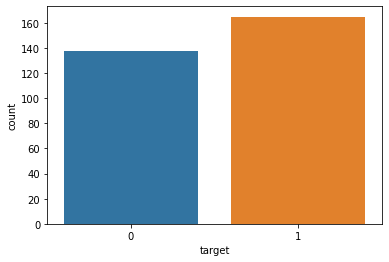

In [7]:
sns.countplot(x="target",data=df) #data Seems Balanced

<AxesSubplot:xlabel='gender', ylabel='count'>

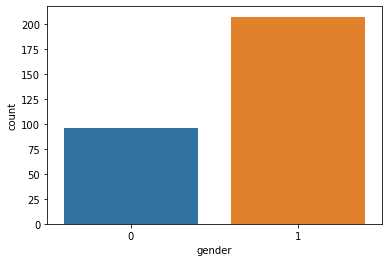

In [8]:
sns.countplot(x =df.gender) 
# 0--> Male 1--> Female

In [9]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

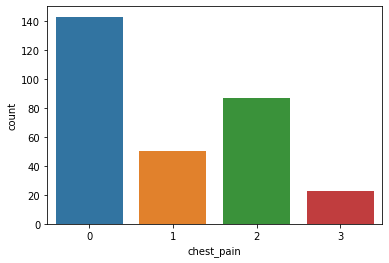

In [10]:
sns.countplot(x=df.chest_pain) # the Chest pain experience of the patient

In [11]:
df.corr() # Checking for data correlation 

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [12]:
df.info() # Getting detail on the feature of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check for Missing Values

In [13]:
# Checking for missing values
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:>

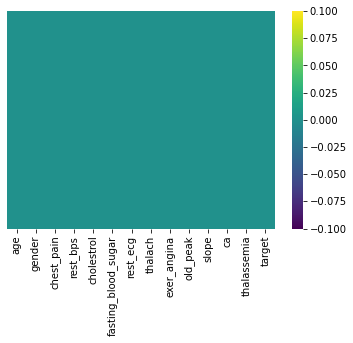

In [14]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

### No missing values present in the Dataset 

### Check For Outliers

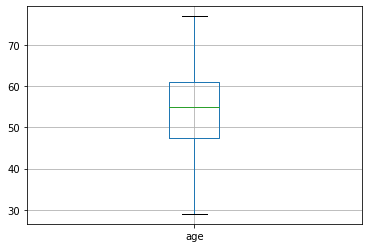

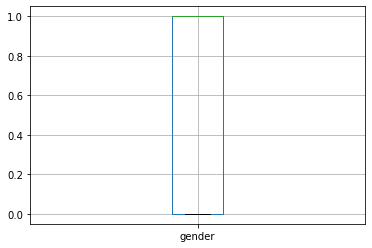

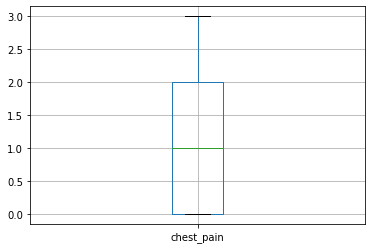

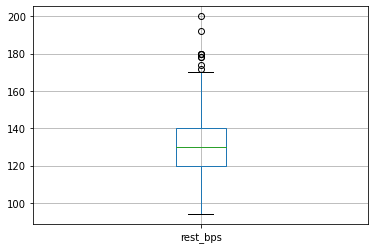

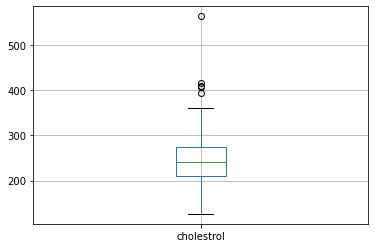

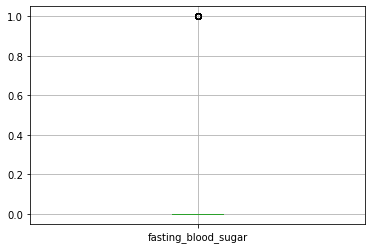

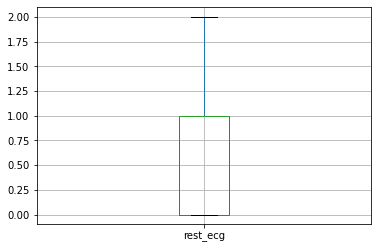

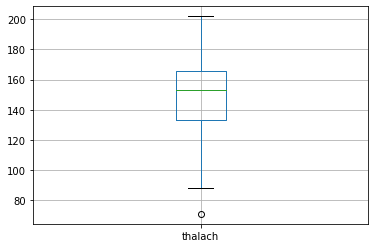

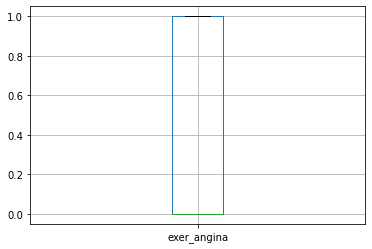

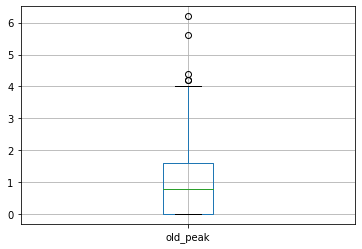

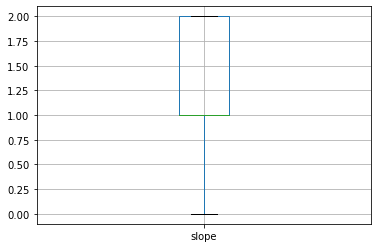

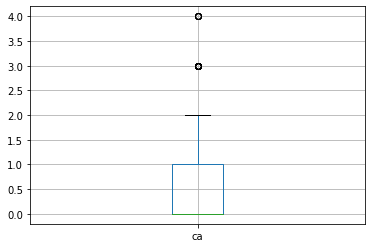

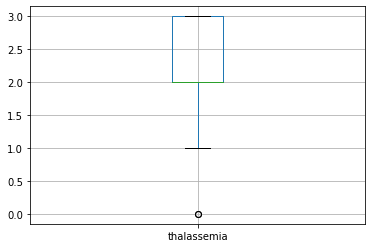

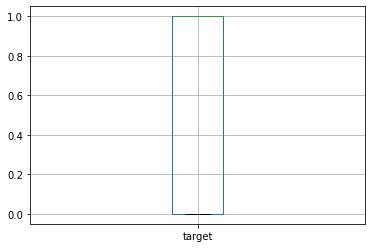

In [15]:
# Checking for Outliers via visualization:
for col in df.columns:
    plt.figure()
    df.boxplot([col])
    plt.show()

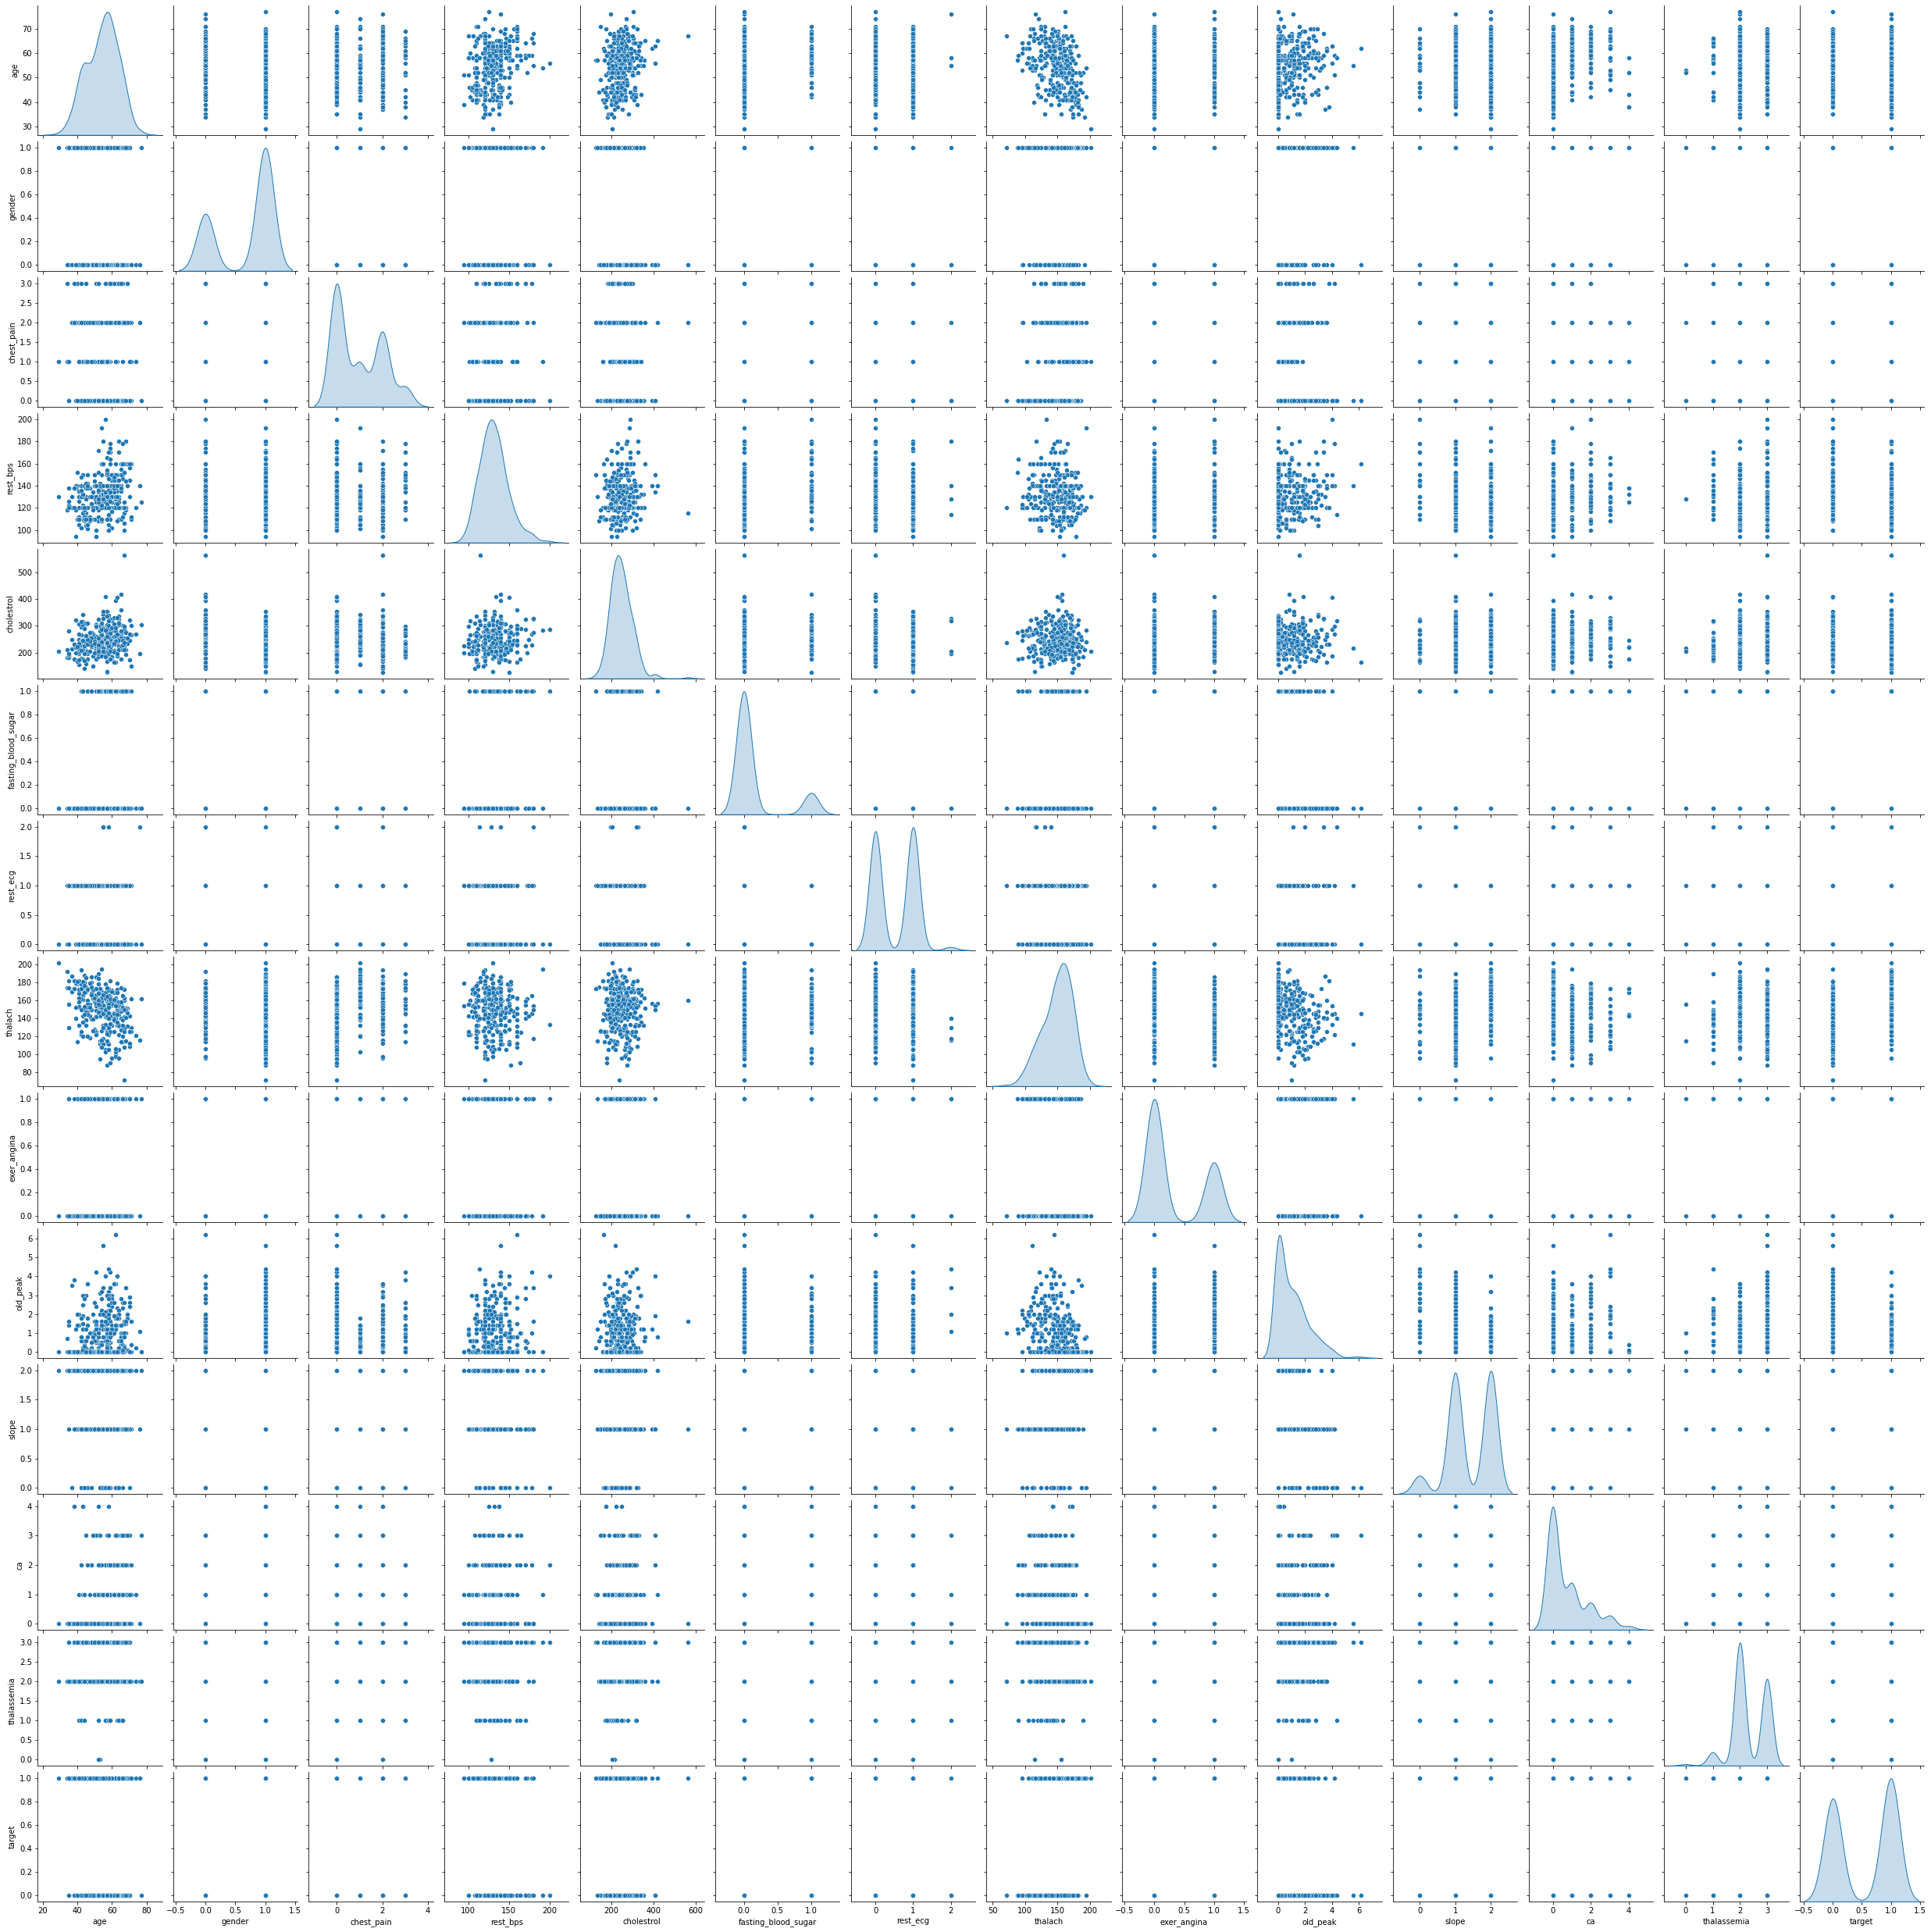

In [16]:
# Visualization of features to check the spread of data:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

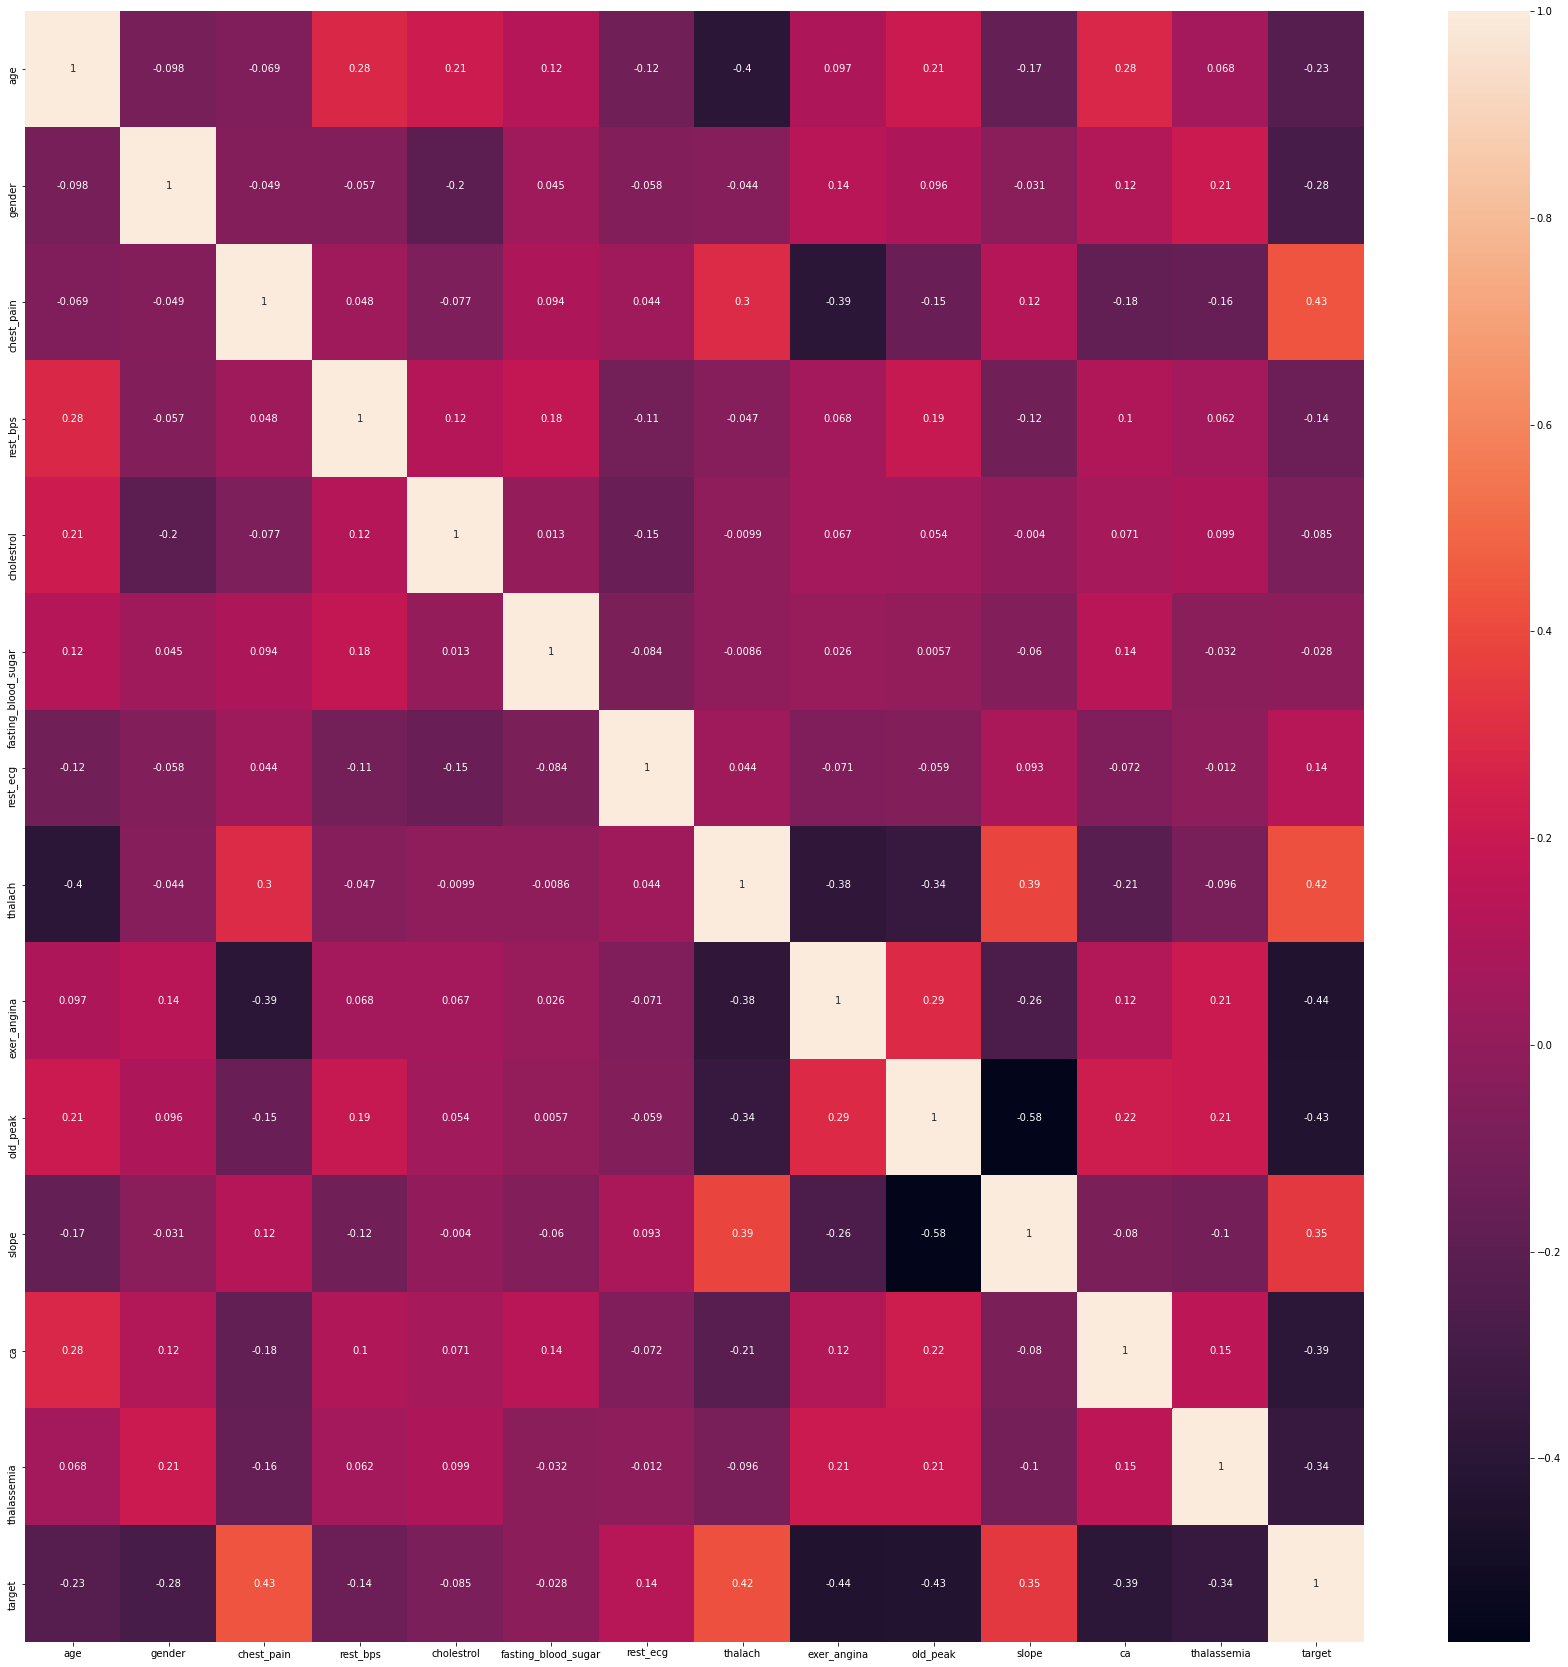

In [17]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Model Building

### 4. Decision Tree Classifier Models and Pruning:

In [18]:
x=df.drop(labels=['target'],axis=1)
y=df[['target']]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

#### 4.1 Decision Tree Model without pruning:

#### 4.1.1 With gini criterion:

In [20]:
# Decision Tree model build with gini criterion
dTree=DecisionTreeClassifier(criterion='gini',random_state=0)

# Fitting the Model
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
dt_g_train=dTree.score(x_train,y_train)
print('Train Score:',dt_g_train)

dt_g_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_g_test)

Train Score: 1.0
Test Score:  0.7472527472527473


### This is a Overfitting Model , Let's try other methods

#### 4.1.2 With entropy criterion:

In [22]:
# Decision Tree model build with entropy criterion
dTree=DecisionTreeClassifier(criterion='entropy',random_state=0)

# Model Fitting
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
dt_e_train=dTree.score(x_train,y_train)
print('Train Score:',dt_e_train)

dt_e_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_e_test)

Train Score: 1.0
Test Score:  0.7142857142857143


### This is a Overfitting Model , Let's try other methods

### 4.2 Decision Tree Model with pruning=3:

#### 4.2.1 With gini criterion:

In [24]:
# Decision Tree model build with gini criterion
dTree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
# Model Fitting
dTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
dt_gprun_train=dTree.score(x_train,y_train)
print('Train Score:',dt_gprun_train)

dt_gprun_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_gprun_test)

Train Score: 0.8490566037735849
Test Score:  0.8351648351648352


### This model also seems to be an overfitting one, we should try with other models.

#### 4.2.2 With entropy criterion:

In [26]:
# Decision Tree model build with entropy criterion
dTree=DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0)
# Model Fitting
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
dt_eprun_train=dTree.score(x_train,y_train)
print('Train Score:',dt_eprun_train)
dt_eprun_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_eprun_test)

Train Score: 0.8490566037735849
Test Score:  0.8351648351648352


### This model also seems to be an overfitting one, we should try with other models.

### 4.3 Decision Tree Model with pruning=3 & additional hyperparameter tuning:

#### 4.3.1 With gini criterion:

In [28]:
# Decision Tree model build with gini criterion
dTree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=3,max_features=6)
# Model Fitting
dTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=6, min_samples_leaf=5,
                       min_samples_split=5)

In [29]:
dt_gpht_train=dTree.score(x_train,y_train)
print('Train Score:',dt_gpht_train)
dt_gpht_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_gpht_test)

Train Score: 0.7971698113207547
Test Score:  0.7912087912087912


### This model also seems to be an overfitting one, we should try with other models.

#### 4.3.2 With entropy criterion:

In [30]:
# Decision Tree model build with entropy criterion
dTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,min_samples_split=5,max_depth=3,max_features=10)
# Model Fitting
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                       min_samples_leaf=5, min_samples_split=5)

In [31]:
dt_epht_train=dTree.score(x_train,y_train)
print('Train Score:',dt_epht_train)
dt_epht_test=dTree.score(x_test,y_test)
print('Test Score: ',dt_epht_test)

Train Score: 0.839622641509434
Test Score:  0.7802197802197802


### This model also seems to be an overfitting one, we should move on to conclusion segment.

### 5. Conclusion:

In [32]:
print("Scores of Decision Tree Models:")
print('Decision Tree Model Without Pruning With Gini criterion:')
print('Train Score:',dt_g_train)
print('Test Score: ',dt_g_test)
print('Decision Tree Model Without Pruning With entropy criterion:')
print('Train Score:',dt_e_train)
print('Test Score: ',dt_e_test)
print('Decision Tree Model With Pruning & Gini criterion:')
print('Train Score:',dt_gprun_train)
print('Test Score: ',dt_gprun_test)
print('Decision Tree Model With Pruning & Entropy criterion:')
print('Train Score:',dt_eprun_train)
print('Test Score: ',dt_eprun_test)
print('Decision Tree Model With Pruning, Other Hyper Parameters Tweaking & Gini criterion:')
print('Train Score:',dt_gpht_train)
print('Test Score: ',dt_gpht_test)
print('Decision Tree Model With Pruning, Other Hyper Parameters Tweaking & Entropy criterion:')
print('Train Score:',dt_epht_train)
print('Test Score: ',dt_gpht_test)

Scores of Decision Tree Models:
Decision Tree Model Without Pruning With Gini criterion:
Train Score: 1.0
Test Score:  0.7472527472527473
Decision Tree Model Without Pruning With entropy criterion:
Train Score: 1.0
Test Score:  0.7142857142857143
Decision Tree Model With Pruning & Gini criterion:
Train Score: 0.8490566037735849
Test Score:  0.8351648351648352
Decision Tree Model With Pruning & Entropy criterion:
Train Score: 0.8490566037735849
Test Score:  0.8351648351648352
Decision Tree Model With Pruning, Other Hyper Parameters Tweaking & Gini criterion:
Train Score: 0.7971698113207547
Test Score:  0.7912087912087912
Decision Tree Model With Pruning, Other Hyper Parameters Tweaking & Entropy criterion:
Train Score: 0.839622641509434
Test Score:  0.7912087912087912


# Conclusion:
## All the models seems to be overfitting we can go with the least overfitting model i.e. the Decision Tree model with Pruning, other hyper parameters tweaking & Gini criterion.